### S&P 500 Index Prediction Using Stacked LSTM

In [1]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [4]:
import pandas as pd
import numpy as np
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
import scikit_learn as sk
import matplotlib as mpl
print("scikit-learn version:", sk.__version__)
print("matplotlib version:", mpl.__version__)   

pandas version: 2.1.3
numpy version: 1.26.4


ModuleNotFoundError: No module named 'scikit_learn'

In [3]:
import streamlit
print("streamlit version:", streamlit.__version__)
import keras
print("keras version:", keras.__version__)

streamlit version: 1.36.0
keras version: 3.3.3


In [5]:
import streamlit as st
import tensorflow as tf

st.title("TensorFlow Test")

try:
    # Check TensorFlow version
    st.write("TensorFlow version:", tf.__version__)
    
    # Create a simple TensorFlow operation
    a = tf.constant(2)
    b = tf.constant(3)
    result = tf.add(a, b)
    
    st.write("Result of TensorFlow operation (2 + 3):", result.numpy())
except Exception as e:
    st.error(f"Error: {e}")


2024-06-24 23:18:38.503 
  command:

    streamlit run C:\Users\Ankan Mazumdar\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [136]:
#reading the data
data = pd.read_csv(r'E:\Projects\StockMarketPrediction-main\StockMarketPrediction-main\data\1\AAPL_ind.csv',encoding='utf-8')

In [137]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600,AAPL
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,AAPL
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,AAPL
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,AAPL
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,AAPL


In [138]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
10967,2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,70122700,AAPL
10968,2024-06-17,213.369995,218.949997,212.720001,216.669998,216.669998,93728300,AAPL
10969,2024-06-18,217.589996,218.630005,213.000000,214.289993,214.289993,79943300,AAPL
10970,2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86172500,AAPL
10971,2024-06-21,210.389999,211.889999,207.110001,207.490005,207.490005,241805100,AAPL


<h3>Predicting returns on stock price</h3>
 
- Here we will directly not predict future stock price, but will predict change in stock price ,because the return on stock price will be a stationery time series, which can give us better result than non stationery time series which is calculated using below formula 

- Return = (Price tomorrow  / Price today) -  1 


In [139]:
data['returns'] = data['Open'].pct_change()
data['returns'] = data['returns'].shift(-1)

In [140]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,returns
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600,AAPL,-0.047823
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800,AAPL,-0.073063
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000,AAPL,0.019703
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600,AAPL,0.028992
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600,AAPL,0.061029


<h3>Conclusion :</h3>

- So based on given input ['Date','Open','High','Low','Close','Volume'], return columns tell us the return for next day , that is why we used shift operator.

In [141]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,returns
10967,2024-06-14,213.850006,215.169998,211.300003,212.490005,212.490005,70122700,AAPL,-0.002245
10968,2024-06-17,213.369995,218.949997,212.720001,216.669998,216.669998,93728300,AAPL,0.019778
10969,2024-06-18,217.589996,218.630005,213.000000,214.289993,214.289993,79943300,AAPL,-0.016821
10970,2024-06-20,213.929993,214.240005,208.850006,209.679993,209.679993,86172500,AAPL,-0.016547
10971,2024-06-21,210.389999,211.889999,207.110001,207.490005,207.490005,241805100,AAPL,NaN


<h3> Conclusion : </h3>

- The last row is Null, because there is no next day to calculate , return on current day price

In [142]:
data.shape

(10972, 9)

<h3> Conclusion </h3>

- We have 1259 row and 10 columns, and since last row is Null, we need to drop it

In [143]:
df = data[['Date','Open','High','Low','Close','Volume','returns']]

In [144]:
df.head()

,Date,Open,High,Low,Close,Volume,returns
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,-0.047823
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,-0.073063
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,0.019703
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,0.028992
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,0.061029


In [145]:
df.tail()

,Date,Open,High,Low,Close,Volume,returns
10967,2024-06-14,213.850006,215.169998,211.300003,212.490005,70122700,-0.002245
10968,2024-06-17,213.369995,218.949997,212.720001,216.669998,93728300,0.019778
10969,2024-06-18,217.589996,218.630005,213.000000,214.289993,79943300,-0.016821
10970,2024-06-20,213.929993,214.240005,208.850006,209.679993,86172500,-0.016547
10971,2024-06-21,210.389999,211.889999,207.110001,207.490005,241805100,NaN


<h2> Plotting daily return on stock price </h2>

In [146]:
import matplotlib.pyplot as plt


In [147]:
data = df.dropna(subset=['returns'])
data.shape

(10971, 7)

In [148]:
data[np.isfinite(data['returns'])]

,Date,Open,High,Low,Close,Volume,returns
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,-0.047823
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,-0.073063
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,0.019703
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,0.028992
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,0.061029
...,...,...,...,...,...,...,...
10966,2024-06-13,214.740005,216.750000,211.600006,214.240005,97862700,-0.004145
10967,2024-06-14,213.850006,215.169998,211.300003,212.490005,70122700,-0.002245
10968,2024-06-17,213.369995,218.949997,212.720001,216.669998,93728300,0.019778
10969,2024-06-18,217.589996,218.630005,213.000000,214.289993,79943300,-0.016821


Mean change in stock price : 0.01932359741257605


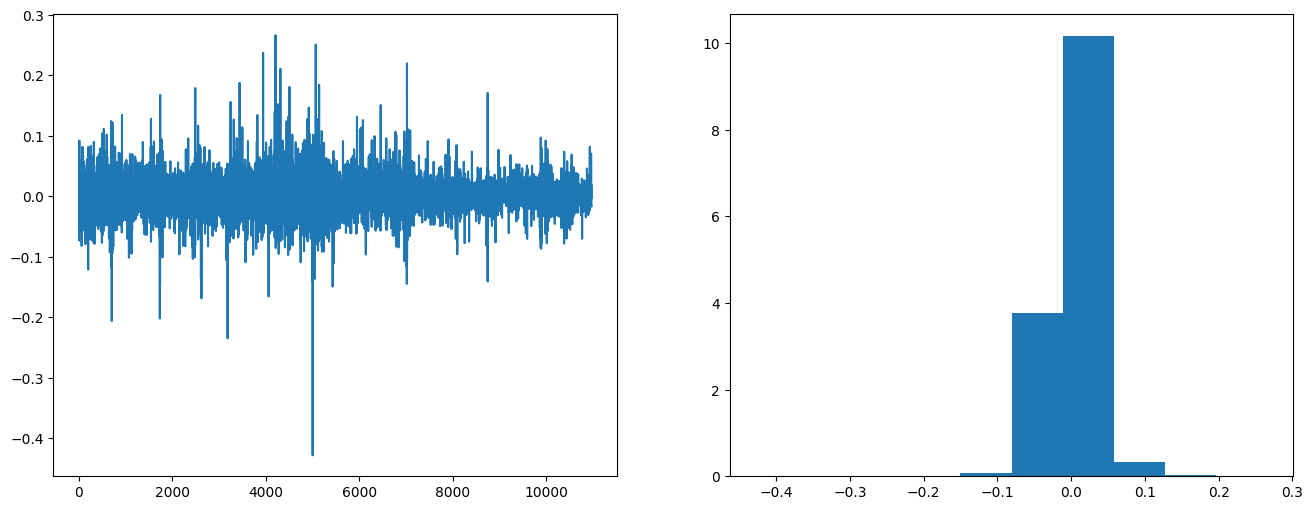

In [149]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
ax1.plot(df['returns'])
ax2.hist(df['returns'], density = True)
print("Mean change in stock price :", abs(df['returns']).mean())

<h3> Conclusion </h3>

- From the above plot we can see that before covid in most cases fluctuation in return on index values on alternate days was between 0 - 0.06 but after covid it increased and reached in the range of 0 - 0.04.

- But, During covid period daily fluctuation in return on index values reached to even 0.06%, which tells us how volatile the market had become during covid time
- An the maximum return values lies in the range of -0.01 to + 0.01

In [150]:
data.dropna(inplace=True)
X = data[['Open','High','Low','Close','Volume']].values

C:\Users\Ankan Mazumdar\AppData\Local\Temp\ipykernel_11520\3092283468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [151]:
data[np.isfinite(data['returns'])]

,Date,Open,High,Low,Close,Volume,returns
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,469033600,-0.047823
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,175884800,-0.073063
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,105728000,0.019703
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,86441600,0.028992
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,73449600,0.061029
...,...,...,...,...,...,...,...
10966,2024-06-13,214.740005,216.750000,211.600006,214.240005,97862700,-0.004145
10967,2024-06-14,213.850006,215.169998,211.300003,212.490005,70122700,-0.002245
10968,2024-06-17,213.369995,218.949997,212.720001,216.669998,93728300,0.019778
10969,2024-06-18,217.589996,218.630005,213.000000,214.289993,79943300,-0.016821


In [152]:
y = data[['returns']].values

In [153]:
X.shape, y.shape

((10971, 5), (10971, 1))

<h3> Conclusion </h3>

- After dropping the Null values and unnecessery columns, we are left with 1258 rows and 5 columns in independent features
- And we have 1258 rows in dependent variable whih are continyous variable.

# LSTM MODEL

An enhanced RNN, or sequential network, called a long short-term memory network, permits information to endure. It is capable of resolving the RNN's vanishing gradient issue. RNNs, also referred to as recurrent neural networks, are utilised for persistent memory.

<h3>LSTM Architecture</h3>

LSTM functions on a high level very similarly to an RNN cell. The LSTM network's internal operation is seen below. Each of the three components that make up the LSTM—the input gate, forget gate, and update gate—performs a specific function.


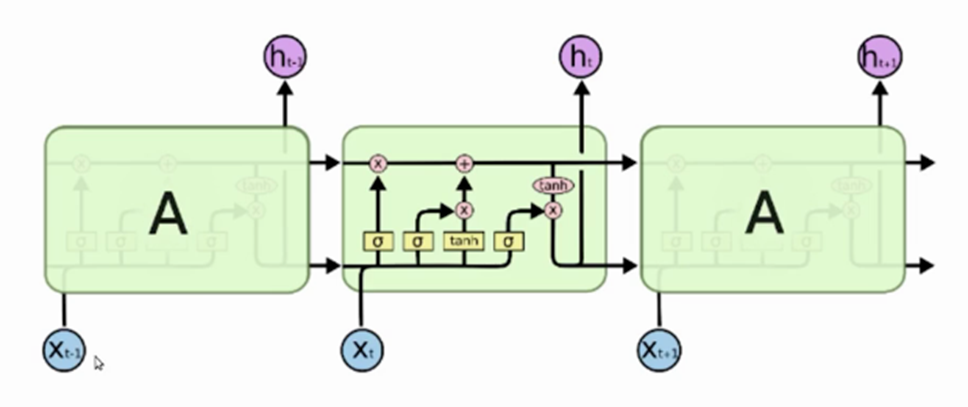 

Fig. LSTM architecture diagram by Christopher Olah (https://colah.github.io/posts/2015-08-Understanding-LSTMs/)


<h4>i. Forget Gate</h4>
The initial step in an LSTM network cell is to choose whether to keep or discard the data from the preceding timestamp. The forget gate equation is given below.


                                        ft = σ(Xt * Uf  + Ht-1* Wf)
                                        
                                        
•	Xt: input to the current timestamp.
•	Uf: weight associated with the input
•	Ht-1: The hidden state of the previous timestamp
•	Wf: It is the weight matrix associated with hidden state


<h4>ii.Input Gate</h4>
The value of the fresh information carried by the input is measured by the input gate. The input gate's equation is shown below.
                                          it = σ(Xt * Ui  + Ht-1* Wi
 
Here,
•	Xt: Input at the current timestamp t
•	Ui: weight matrix of input
•	Ht-1: A hidden state at the previous timestamp
•	Wi: Weight matrix of input associated with hidden state


<h4>iii.Output Gate</h4>
The Output gate's equation, which is quite similar to the equations for the two earlier gates, is shown below.

                                            Ot = σ(Xt * Uo  + Ht-1* Wo

                                           
 
Due to this sigmoid function, it will also have a value between 0 and 1. We will now use Ot and tanh of the updated cell state to determine the current hidden state. As shown below.
                                          
                                          Ht = Ot * tanh(Ct)
 
It turns out that the concealed state depends on both the present output and long-term memory (Ct). Simply activate SoftMax on hidden state Ht if you need to take the output of the current timestamp.
 
                                           Output = Softmax(Ht)

<h1> 1. Data Preprocessing </h1>

<h3> Step 1.i. Scaling the feature variable </h3>

- In machine learning algorithms if the values of the features are closer to each other, there are chances for the algorithm to get trained well and faster instead of the data set where the data points or features values have high differences with each other will take more time to understand the data and the accuracy will be lower.

In [154]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler_x=MinMaxScaler()
scaler_y=MinMaxScaler()
X_scaled=scaler_x.fit_transform(np.array(X))
Y_scaled=scaler_y.fit_transform(np.array(y))

<h3>Step 1.ii. Splitting the data into train and test data</h3>

In [155]:
split = int(len(X_scaled) * 0.9)
print(split)
print (len(X_scaled), len(y_scaled))

9873
10971 19158


In [156]:
##splitting dataset into train and test split
X_tr, X_tst = X_scaled[:split], X_scaled[split:]


In [157]:
X_tr.shape, X_tst.shape

((9873, 5), (1098, 5))

In [158]:
##splitting dataset into train and test split
y_tr, y_tst = y_scaled[:split], y_scaled[split:]

In [159]:
y_tr.shape, y_tst.shape

((9873, 1), (9285, 1))

<h3> Conclusion </h3>

- We have 1132 rows in training data and 126 rows in test data

<h3>1.iii. Creating Dataset </h3>

- Here we will be using LSTM to train our model, which takes sequence of time step input, instead of single input, so we need to prepare our dataset, which are sequence of time step input.

In [160]:
def create_dataset(data_x, data_y, time_step=1):
    data_X, data_Y = [], []
    # Loop through data with a range that ensures index does not exceed bounds
    for i in range(len(data_x) - time_step):
        a = data_x[i:(i + time_step), :]
        data_X.append(a)
        if i + time_step < len(data_y):  # Ensure index is within bounds
            data_Y.append(data_y[i + time_step])
    return np.array(data_X), np.array(data_Y)


In [161]:

time_step = 10  # Use previous 10 days data to predict future value

# Create training and testing datasets
X_train, y_train = create_dataset(X_tr, y_tr, time_step)
X_test, y_test = create_dataset(X_tst, y_tst, time_step)

# Output the shapes of the datasets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (9863, 10, 5)
y_train shape: (9863, 1)
X_test shape: (1088, 10, 5)
y_test shape: (1088, 1)


In [162]:
X_train.shape, y_train.shape

((9863, 10, 5), (9863, 1))

In [163]:
print('Number of input rows = ',X_train.shape[0])
print('Number of sequence input which will be fed into lstm model to train it = ',X_train.shape[1])
print('Number of columns = ',X_train.shape[2])

Number of input rows =  9863
Number of sequence input which will be fed into lstm model to train it =  10
Number of columns =  5


In [164]:
X_test.shape, y_test.shape

((1088, 10, 5), (1088, 1))

In [165]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , X_test.shape[2])

<h1>2. Creating LSTM model</h1>

In [166]:
## importing necessery library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [167]:
#creating stacked model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [168]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 10, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,651 (201.76 KB)

 Trainable params: 51,651 (201.76 KB)

 Non-trainable params: 0 (0.00 B)

- Number of trainable parameters = 51,651, thsese parameter will predict future price for stock data based on 10 previous days



In [169]:
#training the model
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=60,batch_size=64,verbose=1)

Epoch 1/60
155/155 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - loss: 0.1770 - val_loss: 0.0053
Epoch 2/60
155/155 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - loss: 0.0088 - val_loss: 0.0028
Epoch 3/60
155/155 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - loss: 0.0070 - val_loss: 2.0467e-04
Epoch 4/60
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - loss: 0.0072 - val_loss: 5.7487e-04
Epoch 5/60
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0066 - val_loss: 0.0031
Epoch 6/60
155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0063 - val_loss: 1.7893e-04
Epoch 7/60
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.0061 - val_loss: 6.6489e-04
Epoch 8/60
155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0059 - val_loss: 0.0010
Epoch 9/60
155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.0059 - val_loss: 1.5465e-04
Epoch 10/60
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0053 - val_loss: 2.1045e-04
Epoch 11/60
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0047 - val_loss: 8.9842e-04
Epoch 1

<h3> Conclusion </h3>

 - Imp point to be noted here is that, mean squarred error at each epoch is not for predicted price of stock , but for return values.

In [170]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

309/309 ━━━━━━━━━━━━━━━━━━━━ 30s 51ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [171]:
train_predict.shape, test_predict.shape

((9863, 1), (1088, 1))

<h3> Creating single row data</h3>

- During the training of our model we used 63 days of stok info, but to analyse the performence of our model, we will only take last day stock info and ignore the remaining 62 days info.

In [172]:
X_train.shape

(9863, 10, 5)

In [173]:
x_train = []
for timestep in X_train :
  x_train.append(timestep[time_step-1])

In [174]:
x_train[0]

array([0.00050022, 0.00049682, 0.00051362, 0.00050491, 0.00748816])

In [175]:
y_tr[0]

array([0.86241842])

In [176]:
x_test = []
for timestep in X_test :
  x_test.append(timestep[time_step-1])

<h3> Scaling up the data </h3> 

- During the min max scaling process, we scale down every values in between 0-1, and now we will upscale the values in their original values

In [177]:
x_train = scaler_x.inverse_transform(x_train)

In [178]:
y_train = scaler_y.inverse_transform(y_train)

In [179]:
x_train[0], y_train[0]

(array([1.58482000e-01, 1.59040004e-01, 1.58482000e-01, 1.58482000e-01,
        5.55744000e+07]),
 array([0.16783015]))

In [180]:
train_predict=scaler_y.inverse_transform(train_predict)

In [181]:
train_predict[0]

array([0.16943684], dtype=float32)

In [182]:
x_test = scaler_x.inverse_transform(x_test)

In [183]:
y_test = y_test.reshape(-1,1)

In [184]:
y_test = scaler_y.inverse_transform(y_test)

In [185]:
test_predict=scaler_y.inverse_transform(test_predict)

In [211]:
import pickle
with open(f'scaler_x_AAPL.sav', 'wb') as f:
      pickle.dump(scaler_x, f)
with open(f'scaler_y_AAPL.sav', 'wb') as f:
    pickle.dump(scaler_y, f)
print(f"Scalers for AAPL saved successfully.")

Scalers for AAPL saved successfully.


<h1>4.Creating Dataframe for train and test data to better analyse and visualise the data.</h1>

In [186]:
#concatinating dependent and independent features in training data
X_train = np.concatenate((x_train,y_train,train_predict), axis = 1)

In [187]:
#concatinating dependent and independent features in test data
X_test = np.concatenate((x_test,y_test,test_predict), axis = 1)

In [188]:
#Creating pandas dataframe for training data
X_train = pd.DataFrame(X_train, columns = ['Open','High','Low','Close','Volume','returns','pred_return'])

In [189]:
#Creating pandas dataframe for test data
X_test = pd.DataFrame(X_test, columns = ['Open','High','Low','Close','Volume','returns','pred_return'])

In [190]:
X_train.head()

,Open,High,Low,Close,Volume,returns,pred_return
0,0.158482,0.159040,0.158482,0.158482,55574400.0,0.167830,0.169437
1,0.160714,0.161272,0.160714,0.160714,93161600.0,0.166108,0.169407
2,0.157366,0.157366,0.156808,0.156808,68880000.0,0.171628,0.169397
3,0.152902,0.152902,0.152344,0.152344,35750400.0,0.170914,0.169393
4,0.154018,0.155134,0.154018,0.154018,21660800.0,0.172940,0.169392


<h3> Calculating original future stock price from return values </h3>

- Return = (Price tomorrow  / Price today) -  1 
- =>  Return + 1 = Price tomorrow  / Price today
- =>  Price tomorrow = Price today * (Return + 1)

In [191]:
X_train['pred_output'] = X_train['Open'] * (1+X_train['pred_return'])


In [192]:
#this future stock price column will be used to test our prediction
X_train['future_output'] = X_train['Open'].shift(-1)

In [193]:
X_train.head()

,Open,High,Low,Close,Volume,returns,pred_return,pred_output,future_output
0,0.158482,0.159040,0.158482,0.158482,55574400.0,0.167830,0.169437,0.185335,0.160714
1,0.160714,0.161272,0.160714,0.160714,93161600.0,0.166108,0.169407,0.187940,0.157366
2,0.157366,0.157366,0.156808,0.156808,68880000.0,0.171628,0.169397,0.184023,0.152902
3,0.152902,0.152902,0.152344,0.152344,35750400.0,0.170914,0.169393,0.178802,0.154018
4,0.154018,0.155134,0.154018,0.154018,21660800.0,0.172940,0.169392,0.180107,0.151228


In [194]:
X_train.tail()

,Open,High,Low,Close,Volume,returns,pred_return,pred_output,future_output
9858,80.232498,80.669998,77.072502,77.377502,199588400.0,0.169114,0.167652,93.683598,76.074997
9859,76.074997,78.372498,75.555000,77.165001,173788400.0,0.176784,0.167650,88.828987,78.827499
9860,78.827499,79.910004,78.407501,79.712502,136616400.0,0.177113,0.167654,92.043274,80.879997
9861,80.879997,81.190002,79.737503,80.362503,118826800.0,0.165805,0.167662,94.440482,80.642502
9862,80.642502,81.305000,80.065002,81.302498,105425600.0,0.171519,0.167670,94.163793,NaN


<h3> Conclusion </h3>

- There is null values in future output column for last row, becaues there is no future values for last column

In [195]:
X_test['pred_output'] = X_test['Open'] * (1+X_test['pred_return'])


In [196]:
X_test['future_output'] = X_test['Open'].shift(-1)

In [197]:
X_test.head()

,Open,High,Low,Close,Volume,returns,pred_return,pred_output,future_output
0,74.315002,76.044998,72.307503,74.544998,222195200.0,0.159681,0.167651,86.773979,75.237503
1,75.237503,75.632500,71.532501,72.019997,230673600.0,0.172551,0.167639,87.850234,71.632500
2,71.632500,74.470001,71.625000,73.162498,198054800.0,0.155904,0.167633,83.640444,70.275002
3,70.275002,71.500000,68.239998,68.379997,320605600.0,0.163929,0.167623,82.054722,64.315002
4,64.315002,69.602501,64.092499,68.339996,426510000.0,0.165150,0.167615,75.095180,70.570000


In [198]:
X_test.tail()

,Open,High,Low,Close,Volume,returns,pred_return,pred_output,future_output
1083,207.369995,220.199997,206.899994,213.070007,198134300.0,0.166918,0.169348,242.487587,214.740005
1084,214.740005,216.750000,211.600006,214.240005,97862700.0,0.167170,0.169397,251.116257,213.850006
1085,213.850006,215.169998,211.300003,212.490005,70122700.0,0.173559,0.169460,250.088964,213.369995
1086,213.369995,218.949997,212.720001,216.669998,93728300.0,0.172061,0.169531,249.542793,217.589996
1087,217.589996,218.630005,213.000000,214.289993,79943300.0,0.167455,0.169601,254.493479,NaN


In [199]:
#let' analyse the loss
# function to calculate absolute percentage error
def cal_ape(y_true, y_pred):
    ape = abs((y_true-y_pred)/y_true) *100
    return ape

In [200]:
X_train['abs_perc_error'] = cal_ape(X_train['pred_output'], X_train['future_output'])

In [201]:
X_test['abs_perc_error'] = cal_ape(X_test['pred_output'], X_test['future_output'])

In [202]:
X_test.head()

,Open,High,Low,Close,Volume,returns,pred_return,pred_output,future_output,abs_perc_error
0,74.315002,76.044998,72.307503,74.544998,222195200.0,0.159681,0.167651,86.773979,75.237503,13.294856
1,75.237503,75.632500,71.532501,72.019997,230673600.0,0.172551,0.167639,87.850234,71.632500,18.460662
2,71.632500,74.470001,71.625000,73.162498,198054800.0,0.155904,0.167633,83.640444,70.275002,15.979640
3,70.275002,71.500000,68.239998,68.379997,320605600.0,0.163929,0.167623,82.054722,64.315002,21.619376
4,64.315002,69.602501,64.092499,68.339996,426510000.0,0.165150,0.167615,75.095180,70.570000,6.025926


In [203]:
X_test.tail()

,Open,High,Low,Close,Volume,returns,pred_return,pred_output,future_output,abs_perc_error
1083,207.369995,220.199997,206.899994,213.070007,198134300.0,0.166918,0.169348,242.487587,214.740005,11.442888
1084,214.740005,216.750000,211.600006,214.240005,97862700.0,0.167170,0.169397,251.116257,213.850006,14.840238
1085,213.850006,215.169998,211.300003,212.490005,70122700.0,0.173559,0.169460,250.088964,213.369995,14.682363
1086,213.369995,218.949997,212.720001,216.669998,93728300.0,0.172061,0.169531,249.542793,217.589996,12.804536
1087,217.589996,218.630005,213.000000,214.289993,79943300.0,0.167455,0.169601,254.493479,NaN,NaN


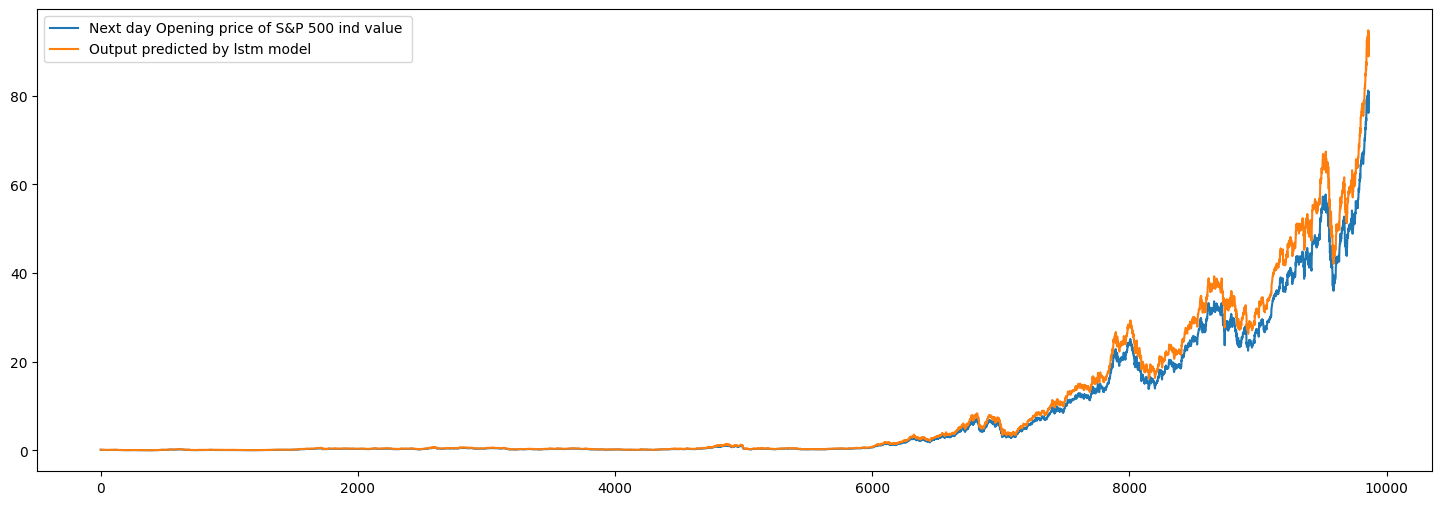

In [204]:
fig, ax = plt.subplots(figsize = (18,6))
plt.plot(X_train['future_output'],label='Next day Opening price of S&P 500 ind value ')
plt.plot(X_train['pred_output'],label = 'Output predicted by lstm model')
plt.legend()
plt.show()

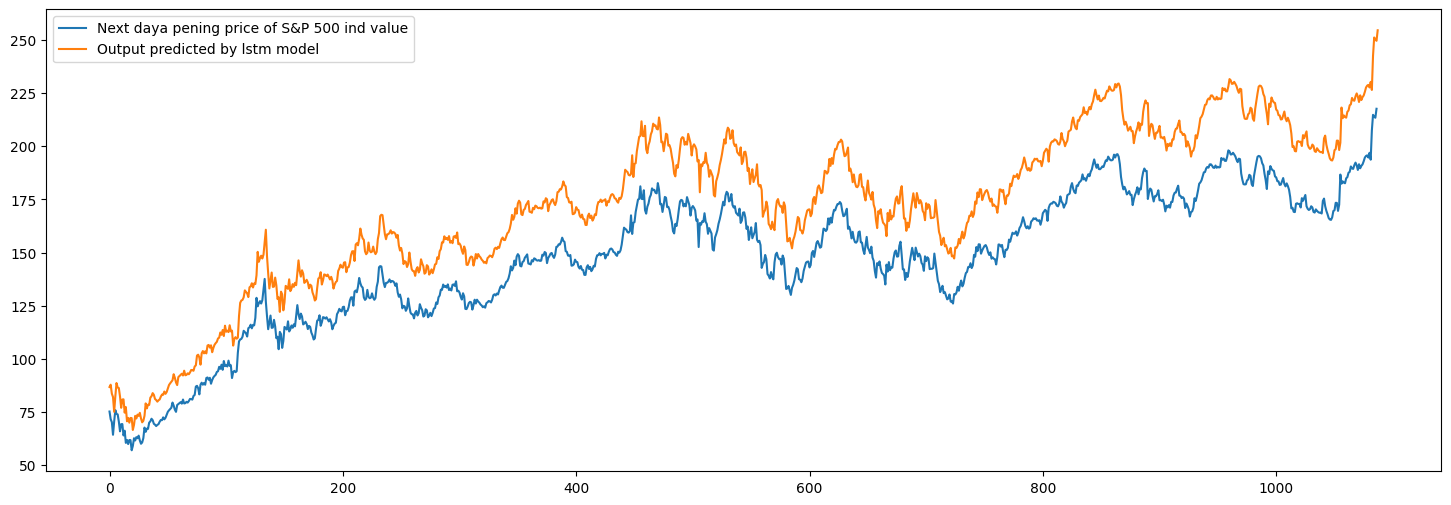

In [205]:
fig, ax = plt.subplots(figsize = (18,6))
plt.plot(X_test['future_output'],label='Next daya pening price of S&P 500 ind value')
plt.plot(X_test['pred_output'],label = 'Output predicted by lstm model')
plt.legend()
plt.show()

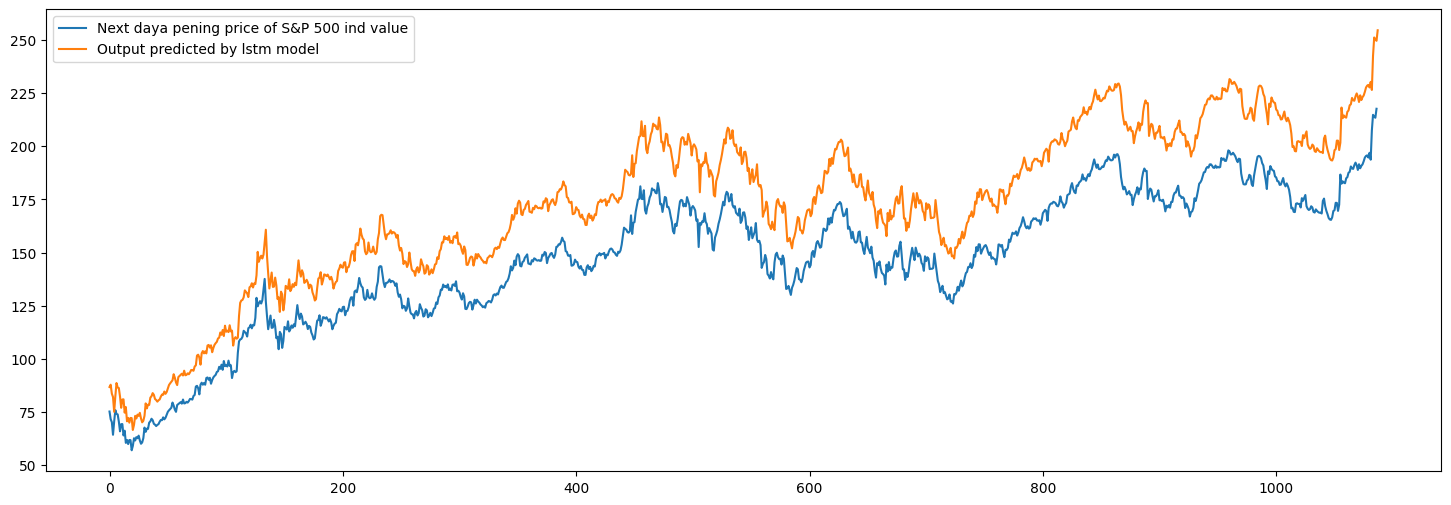

In [206]:
fig, ax = plt.subplots(figsize = (18,6))
plt.plot(X_test['future_output'],label='Next daya pening price of S&P 500 ind value')
plt.plot(X_test['pred_output'],label = 'Output predicted by lstm model')
plt.legend()
plt.show()

In [207]:
def plot_dist_error(data):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))

    ax1.plot(data.dropna())
    ax2.hist(data.dropna(), density = True)
    
    mape = data.mean()
    print(f'Mean absolute percentage error of the model is : {mape:.3f} %')

Mean absolute percentage error of the model is : 14.385 %


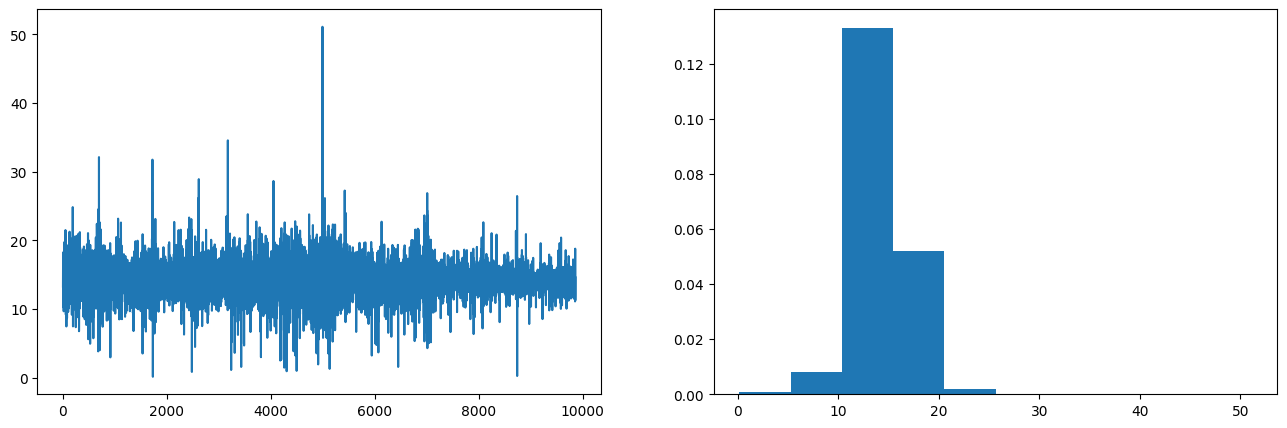

In [208]:
plot_dist_error(X_train['abs_perc_error'])

Mean absolute percentage error of the model is : 14.315 %


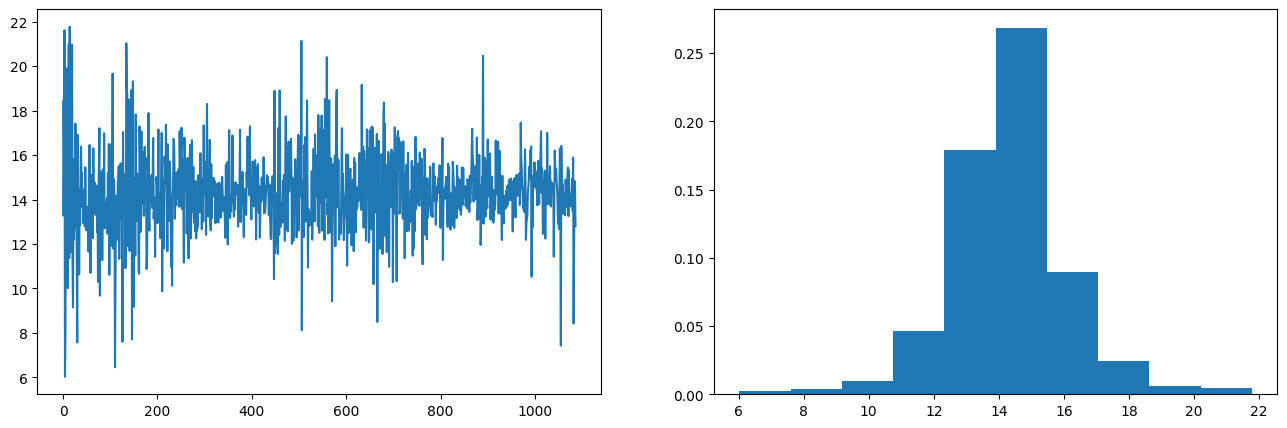

In [209]:
plot_dist_error(X_test['abs_perc_error'])

<h2> Conclusion </h2>

- From the above plot we can see that,about 75% of the time error lies between 0% to 1.5%.
- In some cases error may even shoot up to 3.5% which is not a good sign for our model, but still this is better than ARIMA model, where highest ape(abs percentage error) was 4.5% and mape was 1.232%
- Mape(mean abs percentage error) for our LSTM model is 1.132%, which is good model, but still this model should not be used to perform intraday trading.

In [210]:
model.save('stock_prediction_AAPL.h5')